In [1]:
import pandas as pd

df = pd.read_csv("cleaned_cafe_sales.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4749 entries, 0 to 4748
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    4749 non-null   object 
 1   Item              4749 non-null   object 
 2   Quantity          4749 non-null   float64
 3   Price Per Unit    4749 non-null   float64
 4   Total Spent       4749 non-null   float64
 5   Payment Method    4749 non-null   object 
 6   Location          4749 non-null   object 
 7   Transaction Date  4749 non-null   object 
dtypes: float64(3), object(5)
memory usage: 296.9+ KB


In [2]:
print(df.describe())  # Summary for numerical data
print(df.describe(include='object'))  # Summary for categorical data


          Quantity  Price Per Unit  Total Spent
count  4749.000000     4749.000000  4749.000000
mean      2.867762        2.947673     8.472521
std       1.523818        1.299929     6.167704
min       0.000000        0.000000     0.000000
25%       2.000000        1.500000     4.000000
50%       3.000000        3.000000     7.500000
75%       4.000000        4.000000    12.000000
max       5.000000        5.000000    25.000000
       Transaction ID   Item  Payment Method  Location Transaction Date
count            4749   4749            4749      4749             4749
unique           4749     10               5         4              366
top       TXN_1961373  Salad  Digital Wallet  In-Store       2000-01-01
freq                1    571            1516      2138              199


In [3]:
total_revenue = df['Total Spent'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")


Total Revenue: $40,236.00


In [4]:
print(df['Transaction Date'].min(), df['Transaction Date'].max())


2000-01-01 2023-12-31


In [5]:
df = df[df['Transaction Date'] >= '2022-01-01']  # Adjust as needed


In [6]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')  # Convert & fix errors
df = df.dropna(subset=['Transaction Date'])  # Drop rows where date conversion failed


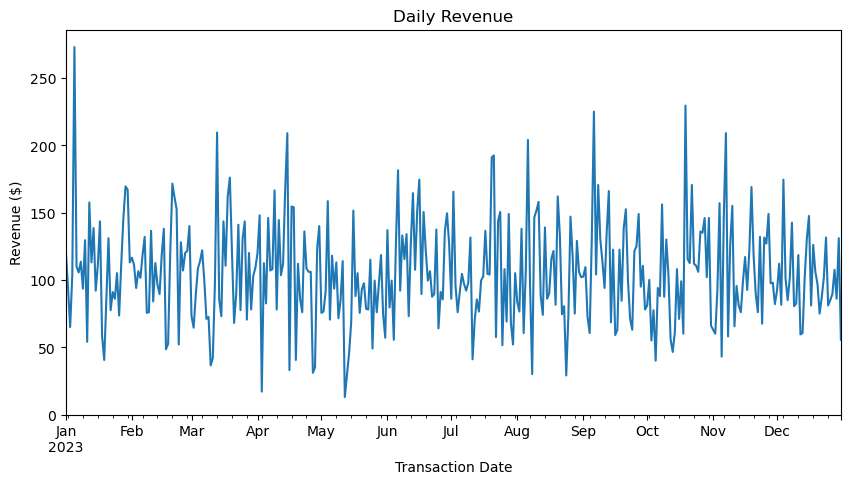

In [7]:
#Revenue over time
import matplotlib.pyplot as plt

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])  # Ensure datetime format
df.set_index('Transaction Date').resample('D')['Total Spent'].sum().plot(figsize=(10, 5), title="Daily Revenue", ylabel="Revenue ($)")
plt.show()



Item
Salad       547
Juice       539
Sandwich    527
Cake        526
Cookie      523
Tea         489
Coffee      480
Smoothie    470
Unknown     308
Error       141
Name: count, dtype: int64


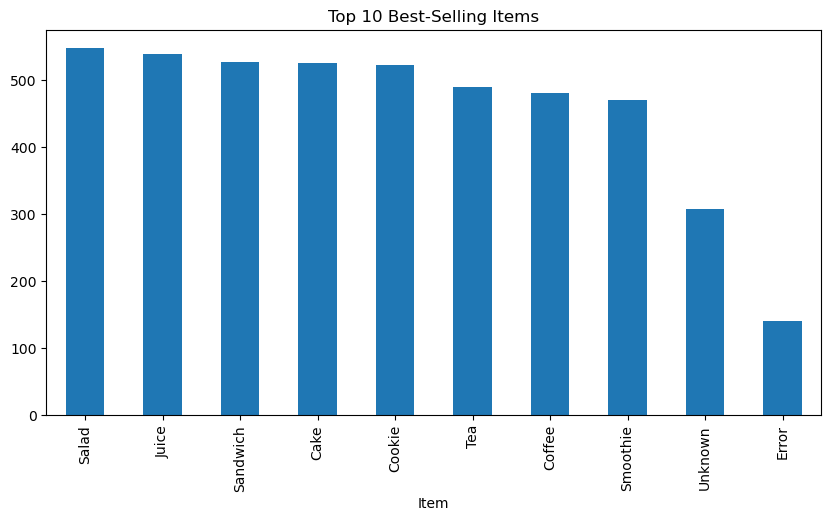

In [8]:
top_items = df['Item'].value_counts().head(10)
print(top_items)
top_items.plot(kind='bar', figsize=(10,5), title="Top 10 Best-Selling Items")
plt.show()


Item
Salad       7905.0
Sandwich    6056.0
Smoothie    5336.0
Cake        4644.0
Juice       4464.0
Coffee      2790.0
Unknown     2542.0
Tea         2128.5
Cookie      1467.0
Error       1172.0
Name: Total Spent, dtype: float64


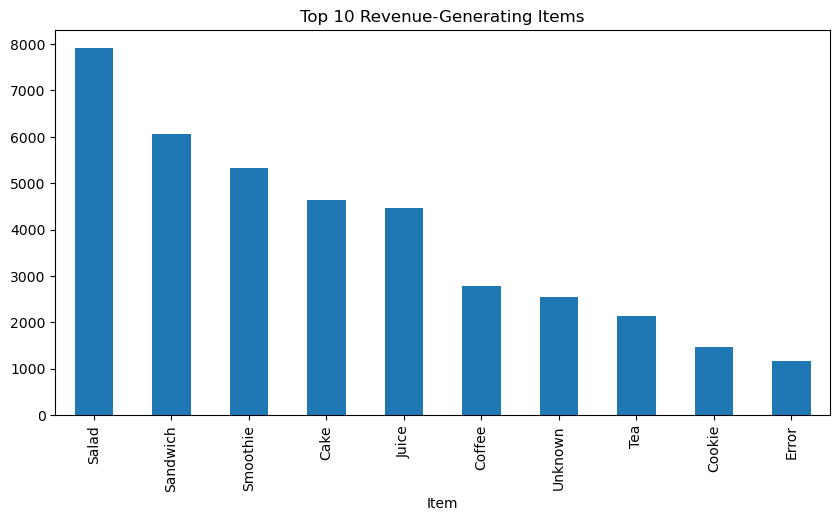

In [9]:
top_revenue_items = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)
print(top_revenue_items)
top_revenue_items.plot(kind='bar', figsize=(10,5), title="Top 10 Revenue-Generating Items")
plt.show()


Payment Method
Digital Wallet    1455
Cash              1388
Credit Card       1368
Error              173
Unknown            166
Name: count, dtype: int64


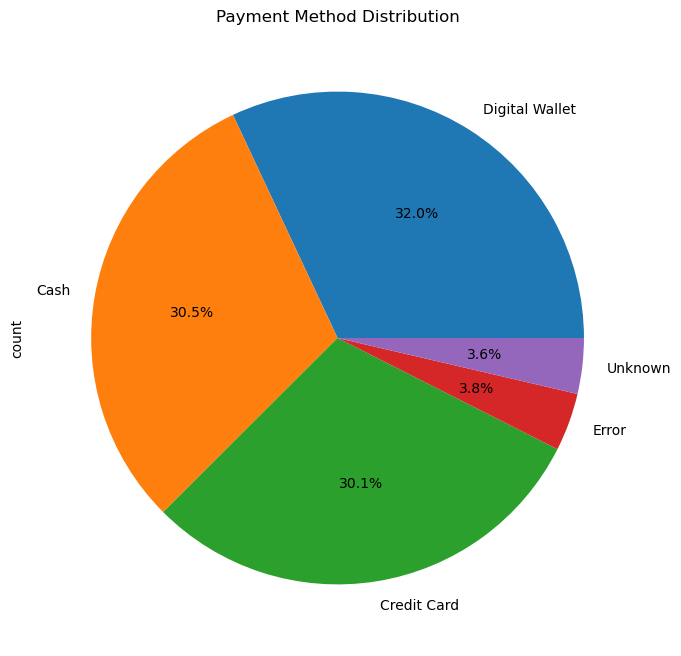

In [10]:
payment_counts = df['Payment Method'].value_counts()
print(payment_counts)
payment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title="Payment Method Distribution")
plt.show()


Location
In-Store    2043
Takeaway    2033
Error        246
Unknown      228
Name: count, dtype: int64


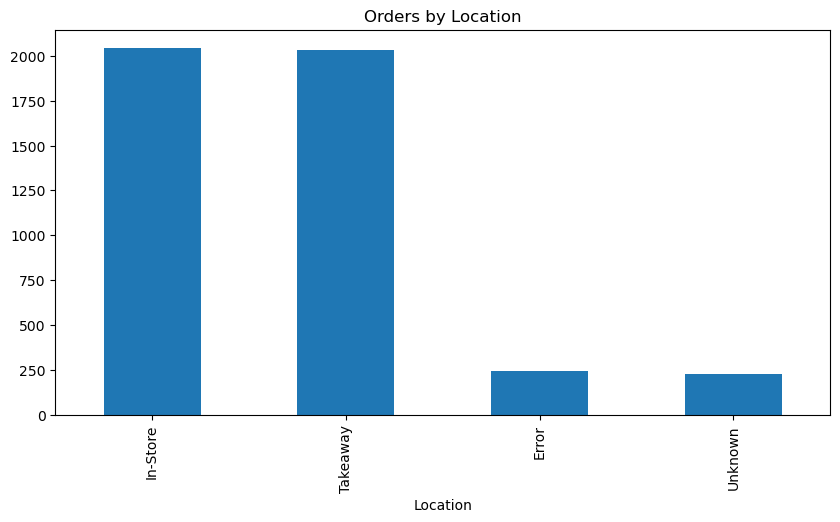

In [11]:
location_counts = df['Location'].value_counts()
print(location_counts)
location_counts.plot(kind='bar', figsize=(10,5), title="Orders by Location")
plt.show()


In [12]:
aov = df['Total Spent'].mean()
print(f"Average Order Value: ${aov:.2f}")


Average Order Value: $8.46


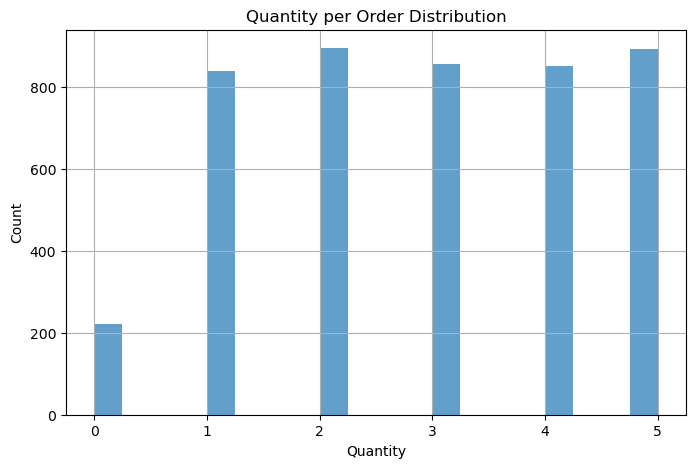

In [13]:
df['Quantity'].hist(bins=20, figsize=(8,5), alpha=0.7)
plt.title("Quantity per Order Distribution")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()


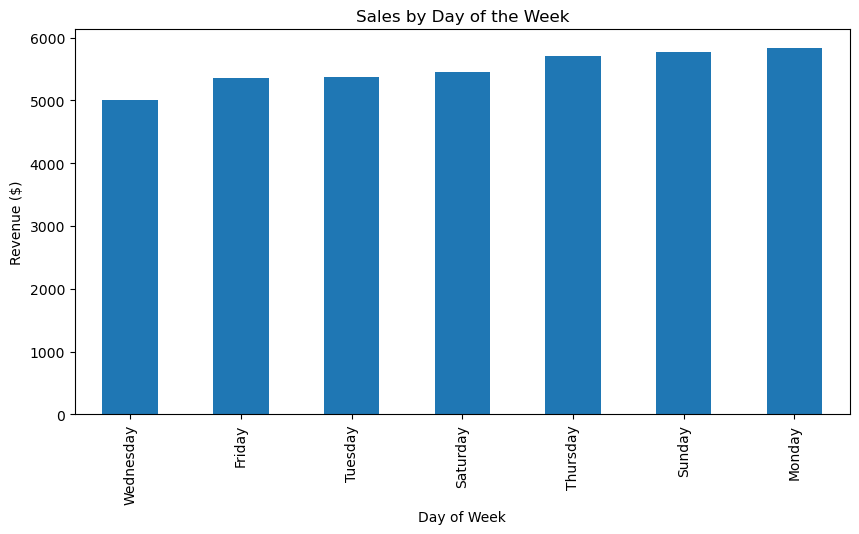

In [14]:
df['Day of Week'] = df['Transaction Date'].dt.day_name()
df.groupby('Day of Week')['Total Spent'].sum().sort_values().plot(kind='bar', figsize=(10,5), title="Sales by Day of the Week", ylabel="Revenue ($)")
plt.show()


In [18]:
correlation_matrix = df[['Quantity', 'Price Per Unit', 'Total Spent']].corr()
correlation_matrix

,Quantity,Price Per Unit,Total Spent
Quantity,1.000000,0.008925,0.571446
Price Per Unit,0.008925,1.000000,0.599529
Total Spent,0.571446,0.599529,1.000000


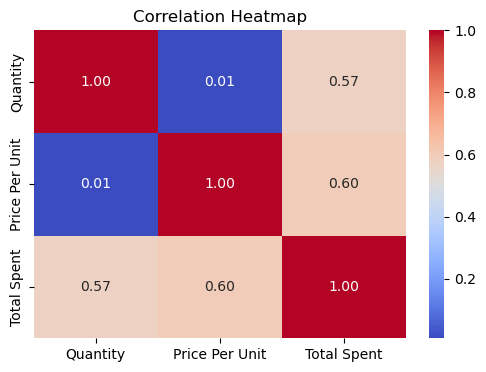

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
df['Payment Method'] = df['Payment Method'].astype('category').cat.codes
df['Location'] = df['Location'].astype('category').cat.codes

categorical_correlation = df[['Payment Method', 'Location', 'Total Spent']].corr()
print(categorical_correlation)

                Payment Method  Location  Total Spent
Payment Method        1.000000  0.012868    -0.011154
Location              0.012868  1.000000    -0.026737
Total Spent          -0.011154 -0.026737     1.000000


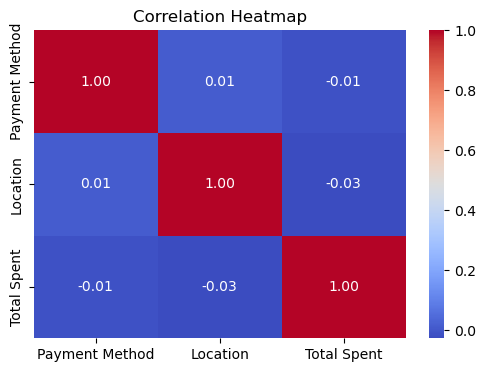

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(categorical_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Feature Engineering

In [22]:
df['Revenue Per Item'] = df['Total Spent'] / df['Quantity']
df['Discount Applied'] = df['Price Per Unit'] - df['Revenue Per Item']


In [26]:
#Time based futures

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])  # Ensure it's in datetime format
df['Day of Week'] = df['Transaction Date'].dt.day_name()
df['Month'] = df['Transaction Date'].dt.month
df['Hour'] = df['Transaction Date'].dt.hour


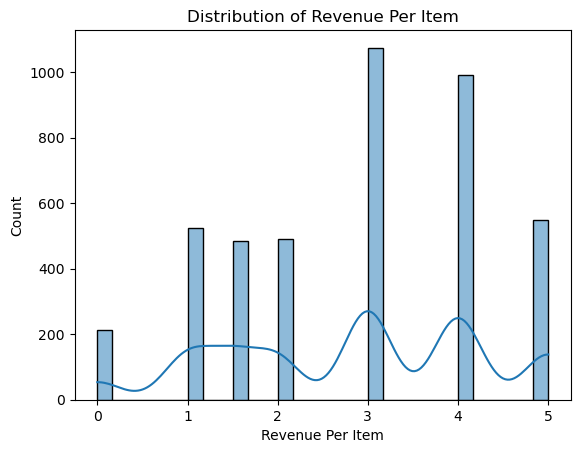

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Revenue Per Item'], bins=30, kde=True)
plt.title("Distribution of Revenue Per Item")
plt.show()


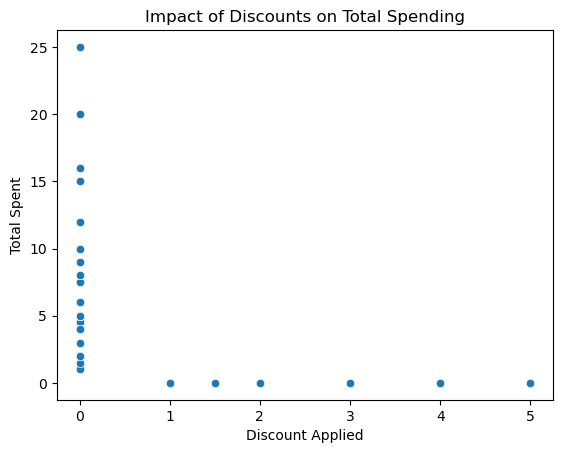

In [28]:
sns.scatterplot(x=df['Discount Applied'], y=df['Total Spent'])
plt.title("Impact of Discounts on Total Spending")
plt.show()


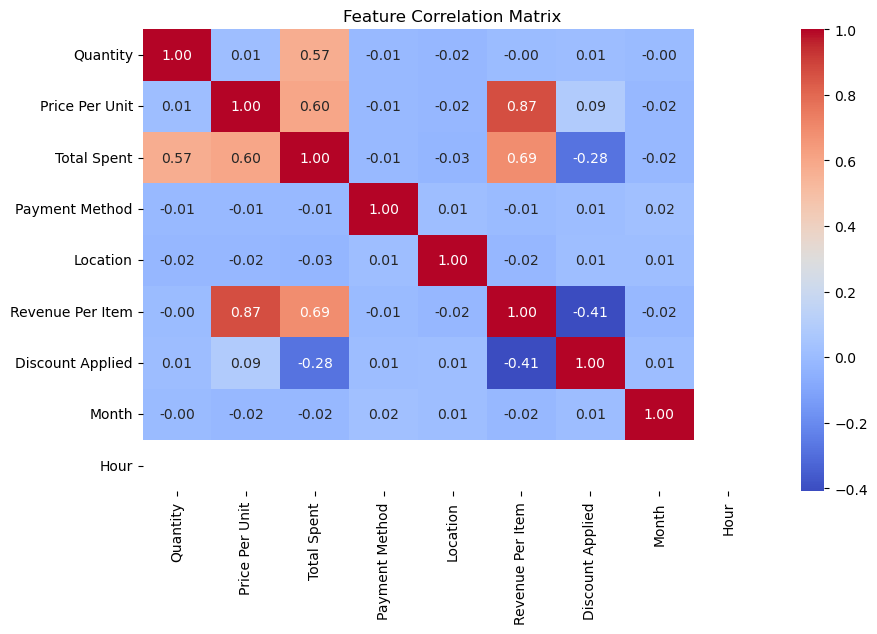

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()
